###Deep Learning Lab Manual CAI2503, Prepared By IC: Pakruddin.B, Asst.Prof., PSCSE,PU. 2025-26

### Lab 8: Batch Normalization in Neural Networks
# ---------------------------------------------
Objective: Compare training of MLP with and without Batch Normalization

Dataset: MNIST

Duration: ~2 hours

###What Students Will Learn
How Batch Normalization reduces internal covariate shift.

Why BN often allows for higher learning rates and faster convergence.

Visual comparison of accuracy and loss curves with/without BN.

How BN helps in reducing overfitting.

###Expected Outputs
Validation accuracy plot: BN should converge faster.

Validation loss plot: BN should show more stable training.

Final test accuracy: BN usually gives slightly higher accuracy.

In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images to vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [3]:
# 2. Build MLP without Batch Normalization
def build_mlp_no_bn():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# 3. Build MLP with Batch Normalization
def build_mlp_with_bn():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
# 4. Train both models
print("\nTraining WITHOUT Batch Normalization...")
model_no_bn = build_mlp_no_bn()
history_no_bn = model_no_bn.fit(x_train, y_train,
                                validation_split=0.2,
                                epochs=10,
                                batch_size=64,
                                verbose=1)

print("\nTraining WITH Batch Normalization...")
model_bn = build_mlp_with_bn()
history_bn = model_bn.fit(x_train, y_train,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=64,
                          verbose=1)


Training WITHOUT Batch Normalization...
Epoch 1/10
 52/750 [=>............................] - ETA: 0s - loss: 0.9411 - accuracy: 0.7299  

2025-09-22 23:08:23.147737: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


750/750 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9239 - val_loss: 0.1178 - val_accuracy: 0.9647
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.1033 - accuracy: 0.9697 - val_loss: 0.1036 - val_accuracy: 0.9677
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0837 - val_accuracy: 0.9742
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 0.0872 - val_accuracy: 0.9757
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0916 - val_accuracy: 0.9735
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0894 - val_accuracy: 0.9753
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0877 - val_accuracy: 0.9773
Epoch 8/10
750/75

In [6]:
# 5. Evaluate on test set
test_loss_no_bn, test_acc_no_bn = model_no_bn.evaluate(x_test, y_test, verbose=0)
test_loss_bn, test_acc_bn = model_bn.evaluate(x_test, y_test, verbose=0)

print(f"\nTest Accuracy WITHOUT BN: {test_acc_no_bn:.4f}")
print(f"Test Accuracy WITH BN: {test_acc_bn:.4f}")


Test Accuracy WITHOUT BN: 0.9737
Test Accuracy WITH BN: 0.9766


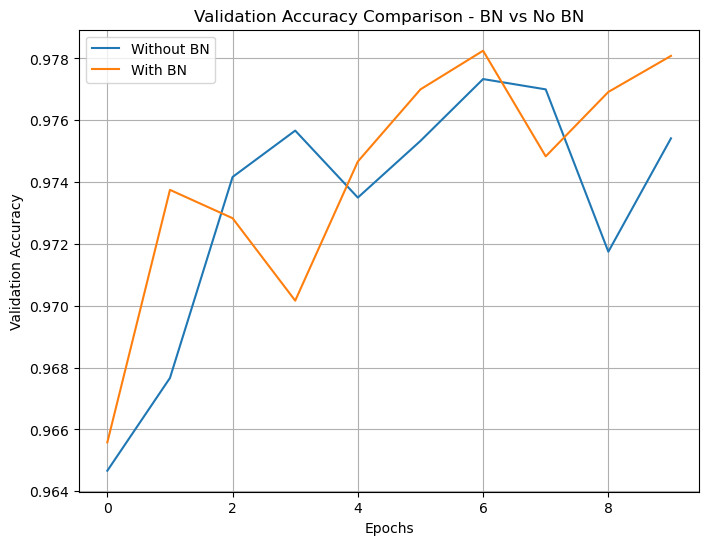

In [7]:
# 6. Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(history_no_bn.history['val_accuracy'], label='Without BN')
plt.plot(history_bn.history['val_accuracy'], label='With BN')
plt.title("Validation Accuracy Comparison - BN vs No BN")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

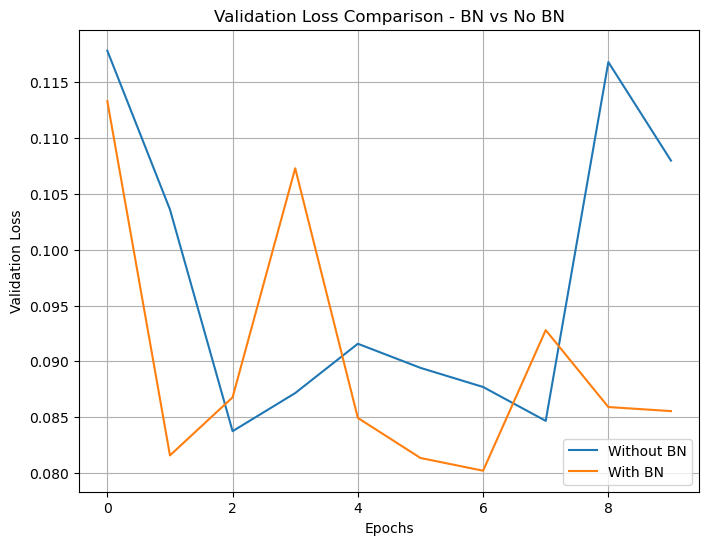

In [8]:
# 7. Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history_no_bn.history['val_loss'], label='Without BN')
plt.plot(history_bn.history['val_loss'], label='With BN')
plt.title("Validation Loss Comparison - BN vs No BN")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()